In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise

from PIL import Image
import requests
from io import BytesIO

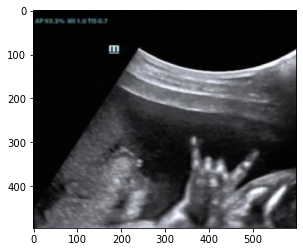

In [19]:
response = requests.get('https://abc3340.com/resources/media/adc3c2e5-8f86-4169-a422-5db927644048-large16x9_31Ultrasound.jpg?1488396226228')
img1 = Image.open(BytesIO(response.content))
img = img_as_float(img1)
img = img[5:500, 1:600]
plt.imshow(img)

estimated noise standard deviation = 0.06256943463192602
PSNR (noisy) = 23.04
PSNR (slow) = 31.52
PSNR (slow, using sigma) = 30.76
PSNR (fast) = 29.52
PSNR (fast, using sigma) = 30.58


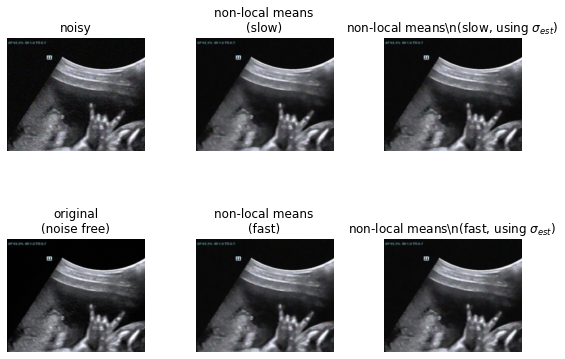

In [20]:
sigma = 0.08
noisy = random_noise(img, var=sigma**2)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, multichannel=True))
print(f"estimated noise standard deviation = {sigma_est}")

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=True)

# slow algorithm
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)

# slow algorithm, sigma provided
denoise2 = denoise_nl_means(noisy, h=0.8 * sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)

# fast algorithm
denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
                                **patch_kw)

# fast algorithm, sigma provided
denoise2_fast = denoise_nl_means(noisy, h=0.6 * sigma_est, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),
                       sharex=True, sharey=True)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise)
ax[0, 1].axis('off')
ax[0, 1].set_title('non-local means\n(slow)')
ax[0, 2].imshow(denoise2)
ax[0, 2].axis('off')
ax[0, 2].set_title(r'non-local means\n(slow, using $\sigma_{est}$)')
ax[1, 0].imshow(img)
ax[1, 0].axis('off')
ax[1, 0].set_title('original\n(noise free)')
ax[1, 1].imshow(denoise_fast)
ax[1, 1].axis('off')
ax[1, 1].set_title('non-local means\n(fast)')
ax[1, 2].imshow(denoise2_fast)
ax[1, 2].axis('off')
ax[1, 2].set_title(r'non-local means\n(fast, using $\sigma_{est}$)')

fig.tight_layout()

# print PSNR metric for each case
psnr_noisy = peak_signal_noise_ratio(img, noisy)
psnr = peak_signal_noise_ratio(img, denoise)
psnr2 = peak_signal_noise_ratio(img, denoise2)
psnr_fast = peak_signal_noise_ratio(img, denoise_fast)
psnr2_fast = peak_signal_noise_ratio(img, denoise2_fast)

print(f"PSNR (noisy) = {psnr_noisy:0.2f}")
print(f"PSNR (slow) = {psnr:0.2f}")
print(f"PSNR (slow, using sigma) = {psnr2:0.2f}")
print(f"PSNR (fast) = {psnr_fast:0.2f}")
print(f"PSNR (fast, using sigma) = {psnr2_fast:0.2f}")

plt.show()